### Growth Accounting 

Growth accounting is a process we do that helps us understand the health of our business. To get started, let’s 
pretend we have a consumer company that intends to get lots of users via some novel social/mobile/content product 
strategy. For these types of companies the most common graph that we see in pitches is a graph of users going up and 
to the right. Sometimes companies try to show us a graph of “cumulative registered users”, which is clearly a vanity 
metric. A user who has registered and is not active in your product is probably not getting much value and is probably 
not a good indication of product-market fit. 

Here, Growth Accounting comes into play. It helps us assess how many of our customers do we actually retain and therefore, helps us calculate real customer growth. It is a much better way of assessing customer growth than through other popular metrics like MAU/WAU etc.

This method accounts for 4 types of Customers/ Users:
1. <b>New Users</b> - These are the users who have started using the app/ platform for the first time.
2. <b>Retained Users</b> - These are the users which the company has retained from the last week/month etc.
3. <b>Resurrected Users</b> - These are the users that had previously stopped using the product but have now come back to it, therefore the word 'resurrected'
4. <b>Churned Users</b> - Finally, these are the users that the company has lost from the previous week/month.

For more information on this subject, you can refer to this article: https://medium.com/swlh/diligence-at-social-capital-part-1-accounting-for-user-growth-4a8a449fddfc

<b>A sample MAU Growth Accounting Chart would look something like this:</b>
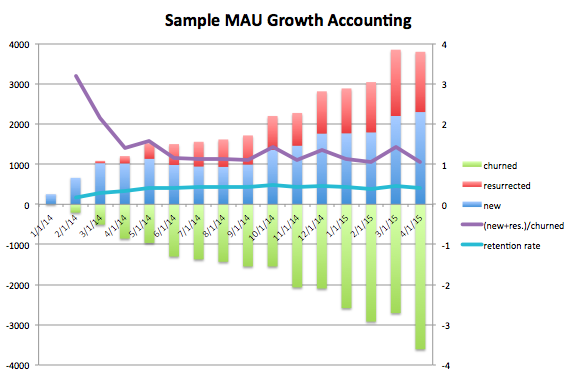

We're currently provided with 2 Worksheets, 1 containg device IDs of active users on a weekly basis, and the other with device Ids of those users who uninstalled the app, also on a weekly basis.

We will be calculating the different types of users on the following basis:
1. <b>New Users</b> - Device IDs who have appeared for the first time in the dataframe.
2. <b>Retained Users</b> - Device IDs which are active in the current week and were also active the week before.
3. <b>Churned Users</b> - Device IDs which were active in the previous week but are not active in the current week.

We know that WAU( Weekly active Users ) can either be new users, retained users from the previous week, or resurrected users from before. So, owing to this knowledge, we can also say that:

4. <b>Resurrected Users</b> = WAU - new - retained

On this understanding, we will now calculate the relevant metrics in order to plot the Growth Accounting Chart.

In [25]:
# Importing necessary libraries
import pandas as pd
from collections import Counter

In [2]:
# Importing csv file containing device IDs of active users on a weekly basis as a pandas dataframe
active_df = pd.read_csv(r'C:\Users\jaspr\Desktop\Desktop\Active Users.csv')
active_df.head()

,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,...,w47,w48,w49,w50,w51,w52,w53,w54,w55,w56
0,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,231d91be38352d7a,306243851b716bf6,149f7dd1efe25ebc,191a909000d7123d,191a909000d7123d,...,ffedb2a5b3b4838,ffedb2a5b3b4838,fff444dcd8f9808f,ffedb2a5b3b4838,ffedb2a5b3b4838,ffedb2a5b3b4838,ffedb2a5b3b4838,fffe76c3a948cdfb,fffe76c3a948cdfb,fffe76c3a948cdfb
1,54910d2b363221e1,520443b0b8128202,a4bce0d054266d68,a4bce0d054266d68,c0bb01dbe2b2de0f,53010d4139ed029f,d1afc6d7c4661d7e,9ab44ee389767d59,91e804eb002a580d,5109246885c54360,...,ffe3d17a83edd05a,ffe3d17a83edd05a,ffedb2a5b3b4838,ffde16048235a32f,ffde16048235a32f,ffe7939306264854,ffe7939306264854,fff444dcd8f9808f,fff444dcd8f9808f,ffe7939306264854
2,520443b0b8128202,a4bce0d054266d68,7b042fcc54a45882,d98da6eaa4bb452f,7b042fcc54a45882,a4bce0d054266d68,3792a1c9395e3e2a,839d5042ee4d8988,a4bce0d054266d68,e254fb2201bf1419,...,ffde16048235a32f,ffde16048235a32f,ffde16048235a32f,ffd99d6c632283a9,ffc6c128db97ab1d,ffe3d17a83edd05a,ffb36133fb3c44e2,ffedb2a5b3b4838,ffedb2a5b3b4838,ffde16048235a32f
3,a4bce0d054266d68,d1afc6d7c4661d7e,aed9597fc6984d64,7b042fcc54a45882,c885df69f0e13074,d1afc6d7c4661d7e,7b042fcc54a45882,a4bce0d054266d68,306243851b716bf6,306243851b716bf6,...,ffb36133fb3c44e2,ffdce5869723d832,ffbafb7cc49be72,ffb36133fb3c44e2,ffb36133fb3c44e2,ffde16048235a32f,ffa8eb6c18e09543,ffe7939306264854,ffde16048235a32f,ffb94deefa8aa79f
4,3792a1c9395e3e2a,7b042fcc54a45882,407d67f50877e6f9,aed9597fc6984d64,aed9597fc6984d64,3792a1c9395e3e2a,a455b3d89d7d6a3b,306243851b716bf6,a99a477e2c336bb9,a99a477e2c336bb9,...,ff7e5bf81a779007,ffb36133fb3c44e2,ffb36133fb3c44e2,ffa96fa38b711342,ffa96fa38b711342,ffb36133fb3c44e2,ff7e5bf81a779007,ffde16048235a32f,ffb36133fb3c44e2,ffb36133fb3c44e2


In [27]:
# Importing csv file containing device IDs of Uninstalled Users on a weekly basis as a pandas dataframe
uninstall_df = pd.read_csv(r'C:\Users\jaspr\Desktop\Desktop\Uninstallers.csv')
uninstall_df.head()

,AB,f0_
0,339ca1fddaaa8cd1,w1
1,986aa5b0c6f42f01,w1
2,cdae59720decd3bc,w1
3,4304a5ba4e33b788,w1
4,71ecdbbcf03c25e4,w1


<b>We can see that the data in this file is not stored in such a form with which we can carry upon our analysis, therefore, we will have to modify it first.</b>

In [30]:
uninstall_df = uninstall_df.pivot(columns= 'f0_', values= 'AB')
uninstall_df.head()

f0_,w1,w10,w11,w12,w13,w14,w15,w16,w17,w18,...,w51,w52,w53,w54,w55,w56,w6,w7,w8,w9
0,339ca1fddaaa8cd1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,986aa5b0c6f42f01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cdae59720decd3bc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4304a5ba4e33b788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,71ecdbbcf03c25e4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b>Now that we have the data in the correct form, we can move further.</b>

In [47]:
# Dropping Null values in both the dataframes
for i in active_df.columns:
    active_df[i].dropna(inplace=True)
    

for i in uninstall_df.columns:
    uninstall_df[i].dropna(inplace=True)

In [70]:
# Creating a dict to store the number of uninstalls per week
uninstall_num = {}


for i in uninstall_df.columns:
    uninstall_num[i] = len(uninstall_df[i])
        

# This will return the number of users who uninstalled the app in that particular week
print('Uninstalls per Week :', uninstall_num)

Uninstalls per Week : {'w1': 499, 'w10': 469, 'w11': 489, 'w12': 500, 'w13': 574, 'w14': 556, 'w15': 503, 'w16': 485, 'w17': 584, 'w18': 512, 'w19': 493, 'w2': 416, 'w20': 507, 'w21': 511, 'w22': 533, 'w23': 434, 'w24': 441, 'w25': 444, 'w26': 467, 'w27': 442, 'w28': 451, 'w29': 382, 'w3': 403, 'w30': 337, 'w31': 343, 'w32': 289, 'w33': 301, 'w34': 363, 'w35': 437, 'w36': 559, 'w37': 476, 'w38': 607, 'w39': 649, 'w4': 473, 'w40': 649, 'w41': 782, 'w42': 496, 'w43': 463, 'w44': 462, 'w45': 348, 'w46': 524, 'w47': 545, 'w48': 543, 'w49': 499, 'w5': 426, 'w50': 499, 'w51': 496, 'w52': 484, 'w53': 519, 'w54': 501, 'w55': 468, 'w56': 487, 'w6': 419, 'w7': 539, 'w8': 614, 'w9': 546}


In [57]:
# Creating a list to store all the unique Device IDs in the dataframe
unique_users = []


# Creating a dictionary to store week wise tally of new users
new_count_dict = {}


# using this variable to keep a count of new users in a particular week
new_count = 0


for i in active_df.columns:
    for j in active_df[i]:
        if j not in unique_users:
            new_count += 1                        
            unique_users.append(j)
    new_count_dict[i] = new_count
    new_count = 0


# This will return the number of new users gained in that particular week
print('New Users Gained :', new_count_dict, sep='\n')

New Users Gained :
{'w1': 1759, 'w2': 723, 'w3': 645, 'w4': 722, 'w5': 674, 'w6': 489, 'w7': 860, 'w8': 1005, 'w9': 719, 'w10': 621, 'w11': 578, 'w12': 634, 'w13': 774, 'w14': 669, 'w15': 527, 'w16': 537, 'w17': 526, 'w18': 515, 'w19': 466, 'w20': 542, 'w21': 508, 'w22': 490, 'w23': 437, 'w24': 386, 'w25': 405, 'w26': 439, 'w27': 457, 'w28': 370, 'w29': 245, 'w30': 175, 'w31': 175, 'w32': 181, 'w33': 279, 'w34': 366, 'w35': 434, 'w36': 655, 'w37': 504, 'w38': 850, 'w39': 900, 'w40': 798, 'w41': 1006, 'w42': 371, 'w43': 413, 'w44': 475, 'w45': 422, 'w46': 592, 'w47': 593, 'w48': 643, 'w49': 576, 'w50': 549, 'w51': 519, 'w52': 550, 'w53': 546, 'w54': 609, 'w55': 484, 'w56': 437}


In [58]:
# Creating a dictionary for storing the week wise tally of Retained Users
retained_users = {}


# As there can't be any retained users in the first week
retained_users['w1'] = 0


# Using variables to keep a count of retained users
retain_count = 0


for i in range(1, len(active_df.columns)):
    for j in active_df[active_df.columns[i]]:
        if j in list(active_df[active_df.columns[i - 1]]):
            retain_count += 1
    retained_users[active_df.columns[i]] = retain_count
    retain_count = 0
                  

# This will return the number of users retained in that particular week        
print('Retained Users :', retained_users, sep='\n')

Retained Users :
{'w1': 0, 'w2': 931, 'w3': 1000, 'w4': 1169, 'w5': 1394, 'w6': 1479, 'w7': 1489, 'w8': 1677, 'w9': 1839, 'w10': 1938, 'w11': 1931, 'w12': 1944, 'w13': 2021, 'w14': 2091, 'w15': 2115, 'w16': 2200, 'w17': 2206, 'w18': 2209, 'w19': 2280, 'w20': 2265, 'w21': 2179, 'w22': 2289, 'w23': 2432, 'w24': 2425, 'w25': 2378, 'w26': 2404, 'w27': 2428, 'w28': 2395, 'w29': 2292, 'w30': 2201, 'w31': 2172, 'w32': 2071, 'w33': 1981, 'w34': 2109, 'w35': 2227, 'w36': 2251, 'w37': 2330, 'w38': 2306, 'w39': 2461, 'w40': 2641, 'w41': 2665, 'w42': 2745, 'w43': 2445, 'w44': 2353, 'w45': 2309, 'w46': 2357, 'w47': 2583, 'w48': 2654, 'w49': 2825, 'w50': 2782, 'w51': 2768, 'w52': 2764, 'w53': 2715, 'w54': 2757, 'w55': 2811, 'w56': 2786}


In [59]:
# Creating a dictionary for storing the week wise tally of Churned Users
churned_users = {}


# As there can't be any churned users in the first week
churned_users['w1'] = 0


# Using variables to keep a count of churned users
churn_count = 0


for i in range(len(active_df.columns) - 1):
    for j in active_df[active_df.columns[i]]:
        if j not in list(active_df[active_df.columns[i + 1]]):
            churn_count += 1
    churned_users[active_df.columns[i + 1]] = churn_count
    churn_count = 0
    

# This will return the number of users churned for that particular week    
print('Churned Users :', churned_users, sep='\n')

Churned Users :
{'w1': 0, 'w2': 828, 'w3': 654, 'w4': 563, 'w5': 722, 'w6': 714, 'w7': 669, 'w8': 873, 'w9': 1036, 'w10': 857, 'w11': 890, 'w12': 802, 'w13': 885, 'w14': 989, 'w15': 936, 'w16': 753, 'w17': 860, 'w18': 836, 'w19': 819, 'w20': 803, 'w21': 923, 'w22': 702, 'w23': 815, 'w24': 769, 'w25': 731, 'w26': 697, 'w27': 759, 'w28': 790, 'w29': 783, 'w30': 644, 'w31': 513, 'w32': 581, 'w33': 576, 'w34': 420, 'w35': 707, 'w36': 636, 'w37': 851, 'w38': 793, 'w39': 940, 'w40': 1096, 'w41': 1081, 'w42': 1269, 'w43': 1003, 'w44': 796, 'w45': 909, 'w46': 734, 'w47': 1000, 'w48': 953, 'w49': 997, 'w50': 1081, 'w51': 986, 'w52': 1037, 'w53': 1053, 'w54': 984, 'w55': 1098, 'w56': 1020}


As we have multiple data points here to plot on a graph, it is way easier to do it through Excel. So, I exported all the data points onto a csv file and then imported the data into an excel sheet and plotted the graph there.

<b>Here is the Weekly Growth Accounting Chart:</b>
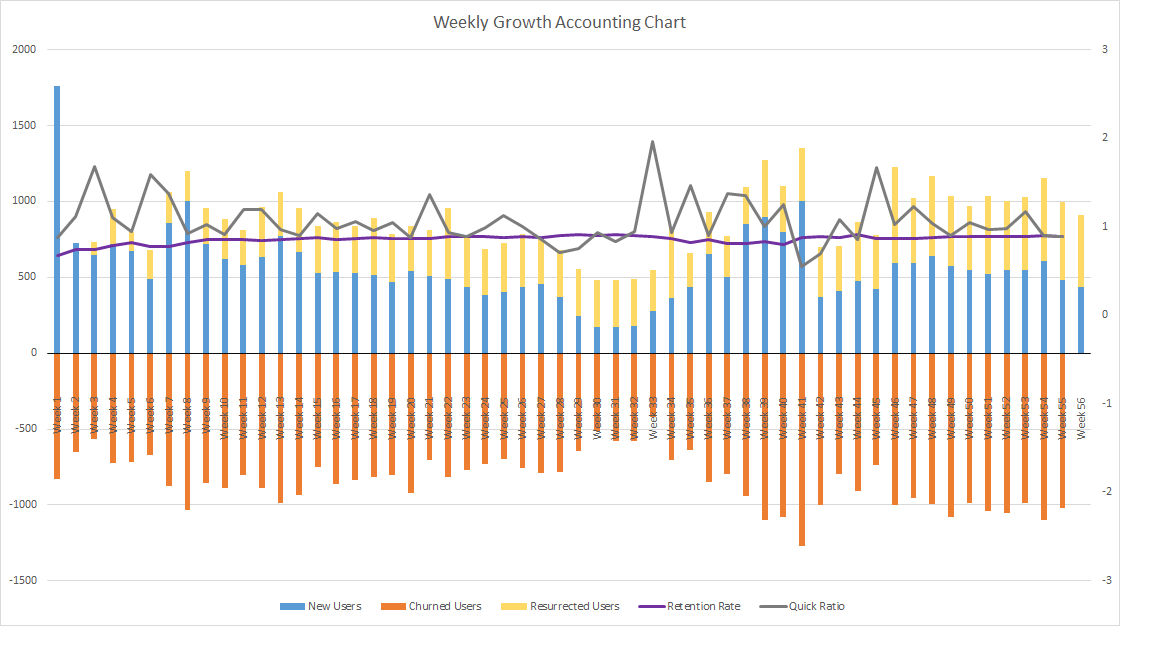

#### Understanding the chart
Apart from the data that we calculated, there are 2 important trend lines to see here, the Quick Ratio and Retention Rate.
<b>Quick ratio</b>
Quick Ratio is calculated as (New + Retained Users)/Churned Users. A Quick Ratio above 1 suggests that the company is gaining more customers than it is losing.

<b>Retention Rate</b>
Retention Rate is calculated as (E - N)/S
                                
                                E = No. of Users at the end of the period
                                N = New users gained in that period
                                S = No. of users at the start of the period
